# Image Denoising Using AutoEncoders in Keras and Python




# Task 1: Import libraries and datasets


In [1]:
%matplotlib inline
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.2.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


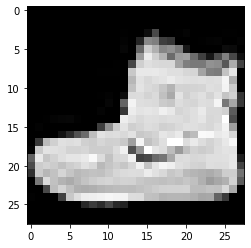

In [3]:
# Visualize a sample image
plt.imshow(x_train[0], cmap="gray")

In [4]:
# Shape of data
print("Training data shape - {}".format(x_train.shape))
print("Testing shape - {}".format(x_test.shape))

Training data shape - (60000, 28, 28)
Testing shape - (10000, 28, 28)


# Task 2: Perform data visualization


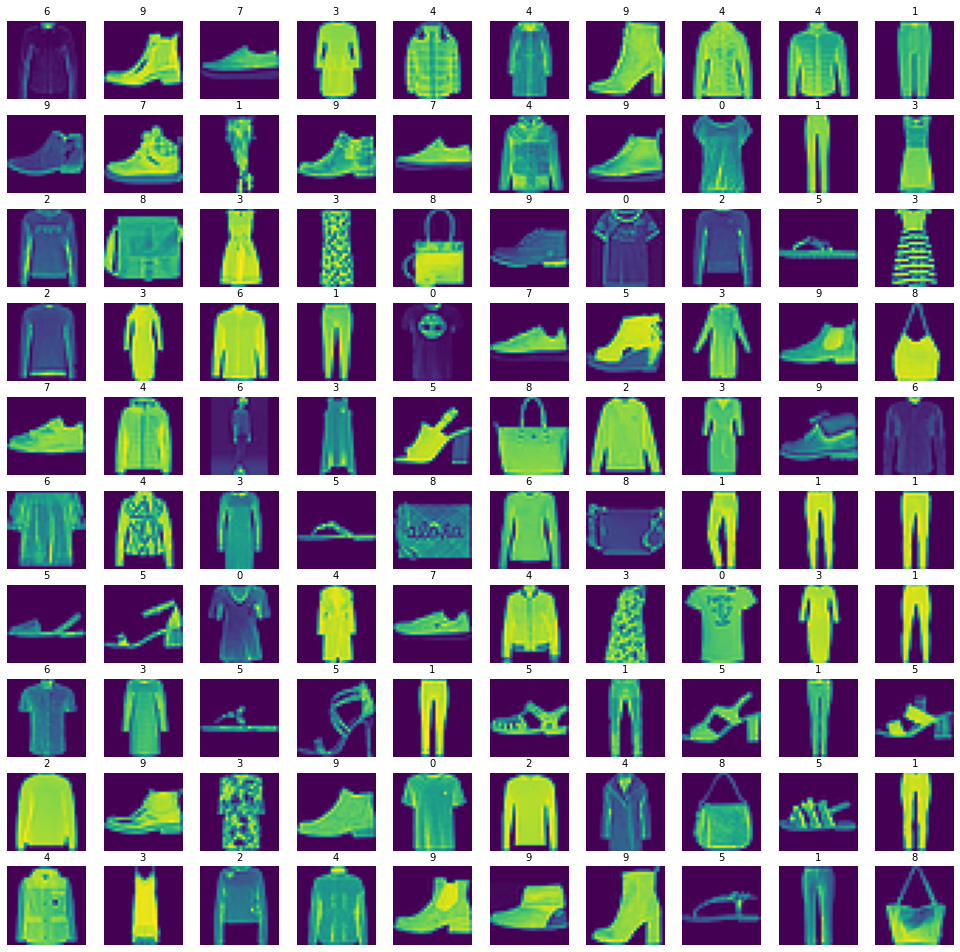

In [5]:
w_grid = 10
l_grid = 10

fig, axes = plt.subplots(l_grid, w_grid, figsize=(17,17))
axes = axes.ravel() # Flatten 15x15 matrix into 225 array
n_training = len(x_train) # Get len of training set

# Select random num between 0 and n_training
for i in np.arange(0, w_grid * l_grid):
  index = np.random.randint(1, n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index], fontsize=10)
  axes[i].axis("off")

# Task 3: Perform data preprocessing


In [6]:
# Normalize data
x_train = x_train/255
x_test = x_test/255

In [7]:
noise_factor = 0.3
noise_dataset_train = []
noise_dataset_test = []

# Add noise to training data
for img in x_train:
  # Adding noise
  noisy_image = img + noise_factor * np.random.rand(*img.shape)
  # Clipping pixels
  noisy_image = np.clip(noisy_image, 0, 1)
  noise_dataset_train.append(noisy_image)

# Add noise to test data
for img in x_test:
  # Adding noise
  noisy_image = img + noise_factor * np.random.rand(*img.shape)
  # Clipping pixels
  noisy_image = np.clip(noisy_image, 0, 1)
  noise_dataset_test.append(noisy_image)

In [13]:
# Converting to np array
noise_dataset_train = np.array(noise_dataset_train)
noise_dataset_test = np.array(noise_dataset_test)

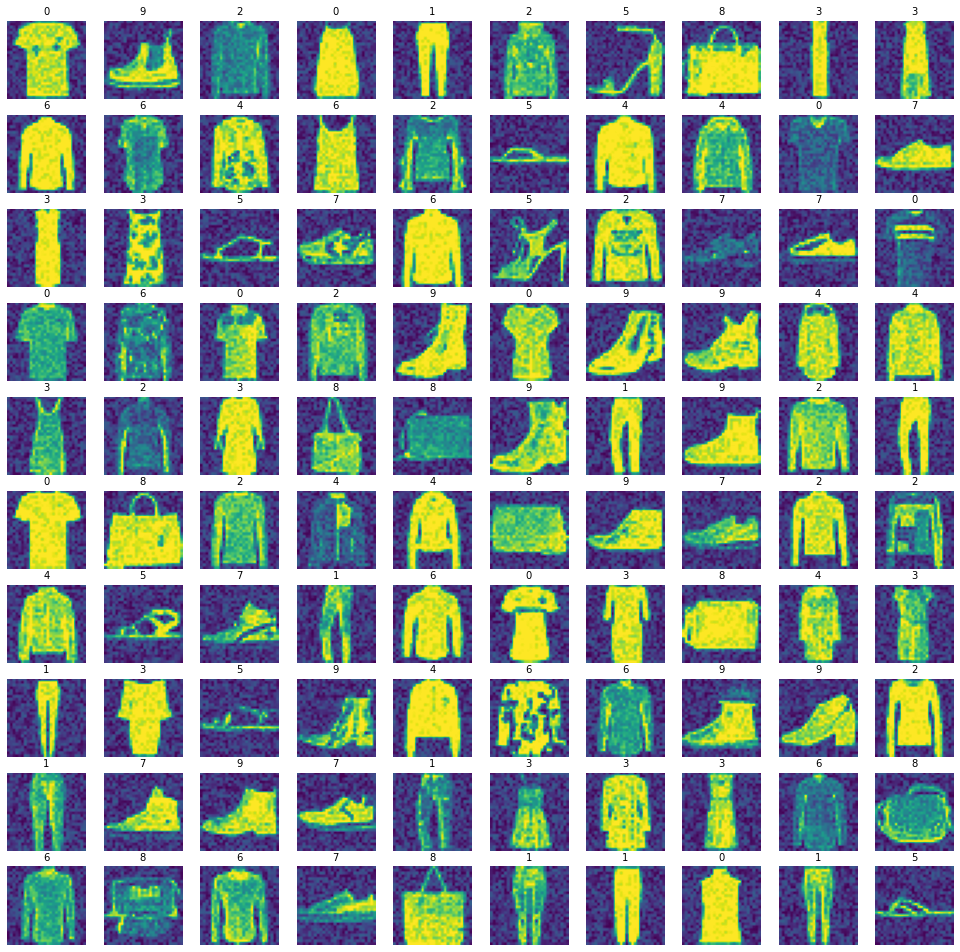

In [24]:
# Visualizing noisy data
w_grid = 10
l_grid = 10

fig, axes = plt.subplots(l_grid, w_grid, figsize=(17,17))
axes = axes.ravel() # Flatten 15x15 matrix into 225 array
n_training = len(noise_dataset_train) # Get len of training set

# Select random num between 0 and n_training
for i in np.arange(0, w_grid * l_grid):
  index = np.random.randint(1, n_training)
  axes[i].imshow(noise_dataset_train[index])
  axes[i].set_title(y_train[index], fontsize=10)
  axes[i].axis("off")

# Task 4: Build and train autoencoder model

In [18]:
autoencoder = tf.keras.models.Sequential()
#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding="same"))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same"))
# Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, padding="same", activation="sigmoid"))

In [19]:
autoencoder.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Training model
autoencoder.fit(noise_dataset_train.reshape(-1, 28, 28, 1), 
                x_train.reshape(-1, 28, 28, 1),
                epochs=10,
                batch_size=200,
                validation_data=(noise_dataset_test.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 2s 8ms/step - loss: 0.3921 - val_loss: 0.3103
Epoch 2/10
300/300 [==============================] - 2s 7ms/step - loss: 0.2982 - val_loss: 0.2934
Epoch 3/10
300/300 [==============================] - 2s 7ms/step - loss: 0.2872 - val_loss: 0.2859
Epoch 4/10
300/300 [==============================] - 2s 7ms/step - loss: 0.2815 - val_loss: 0.2815
Epoch 5/10
300/300 [==============================] - 2s 7ms/step - loss: 0.2780 - val_loss: 0.2788
Epoch 6/10
300/300 [==============================] - 2s 7ms/step - loss: 0.2760 - val_loss: 0.2774
Epoch 7/10
300/300 [==============================] - 2s 7ms/step - loss: 0.2750 - val_loss: 0.2766
Epoch 8/10
300/300 [==============================] - 2s 8ms/step - loss: 0.2742 - val_loss: 0.2761
Epoch 9/10
300/300 [==============================] - 2s 7ms/step - loss: 0.2737 - val_loss: 0.2755
Epoch 10/10
300/300 [==============================] - 2s 7ms/step - loss: 0.2733 - val_loss: 0.2752

# Task 5: Assess trained model performance


In [21]:
evaluation = autoencoder.evaluate(noise_dataset_test.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1))
print("Test Accuracy: {:.3f}".format(evaluation))

313/313 [==============================] - 1s 3ms/step - loss: 0.2752
Test Accuracy: 0.275


In [23]:
predicted = autoencoder.predict(noise_dataset_test[:10].reshape(-1, 28, 28, 1))

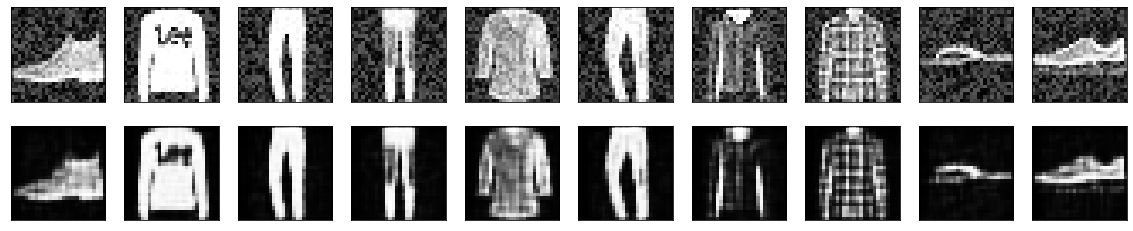

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_dataset_test[:10], predicted], axes):
  for img, ax in zip(images,row):
    ax.imshow(img.reshape((28, 28)), cmap="Greys_r")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)